In [239]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pickle

In [240]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC
from scipy import stats
from scipy.stats import pearsonr
from scipy.stats import ttest_ind
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import CategoricalNB
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [241]:
import warnings
warnings.filterwarnings('ignore')

In [242]:
df = pd.read_csv("/kaggle/input/bank-deposite/4_6037269282688078003.csv")
df.head()


,Loan_ID,Gender,MaritalStatus,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Total_Income,Property_Area,CarsAvailable,Loan_Status,DebtToIncomeRatio,InterestRate
0,LP001002,Male,single,0,Graduate,No,5849,0.0,NaN,360.0,1.0,5849.0,Urban,BMW,Y,0.000000,0
1,LP001003,Male,married,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,6091.0,Rural,Chevrolet,N,2.101461,115200
2,LP001005,Male,married,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,3000.0,Urban,BMW,Y,2.200000,59400
3,LP001006,Male,married,0,student,No,2583,2358.0,120.0,360.0,1.0,4941.0,Urban,BMW,Y,2.428658,108000
4,LP001008,Male,single,0,Graduate,No,6000,0.0,141.0,360.0,1.0,6000.0,Urban,BMW,Y,2.350000,126900


In [243]:
df.shape

(614, 17)

In [244]:
df.isnull().sum()

Loan_ID                0
Gender                13
MaritalStatus          3
Dependents            15
Education              0
Self_Employed         32
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount            22
Loan_Amount_Term      14
Credit_History        50
Total_Income           0
Property_Area          0
CarsAvailable          0
Loan_Status            0
DebtToIncomeRatio      0
 InterestRate          0
dtype: int64

In [245]:
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])
df['MaritalStatus'] = df['MaritalStatus'].fillna(df['MaritalStatus'].mode()[0])
df['Dependents'] = df['Dependents'].fillna(df['Dependents'].mode()[0])
df['Self_Employed'] = df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])

In [246]:
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean())
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].mean())
df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].mean())

In [247]:
df.isnull().sum()

Loan_ID               0
Gender                0
MaritalStatus         0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History        0
Total_Income          0
Property_Area         0
CarsAvailable         0
Loan_Status           0
DebtToIncomeRatio     0
 InterestRate         0
dtype: int64

In [248]:
df.replace({"Loan_Status":{'N':0,'Y':1}},inplace=True)

In [249]:
df['Dependents'].value_counts()

Dependents
0     360
1     102
2     101
3+     51
Name: count, dtype: int64

In [250]:
df = df.replace(to_replace = '3+', value = 4)
df['Dependents'].value_counts()

Dependents
0    360
1    102
2    101
4     51
Name: count, dtype: int64

<Axes: xlabel='MaritalStatus', ylabel='count'>

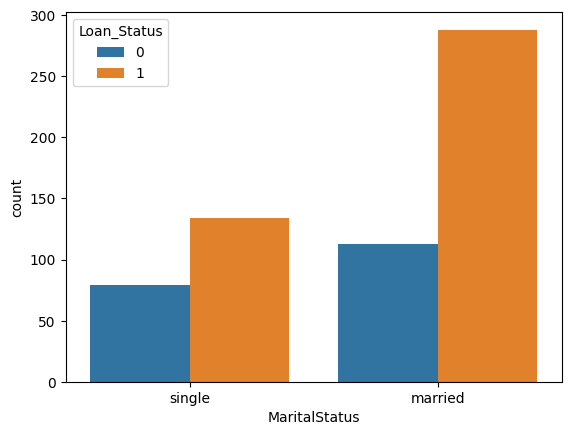

In [251]:
# marital status & Loan Status
sns.countplot(x='MaritalStatus',hue='Loan_Status',data=df)

<Axes: xlabel='Education', ylabel='count'>

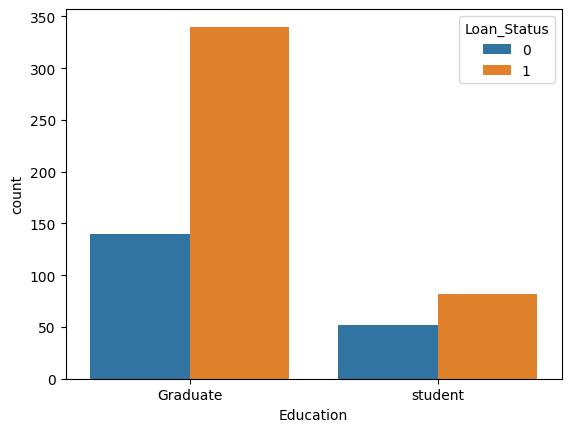

In [252]:
# education & Loan Status
sns.countplot(x='Education',hue='Loan_Status',data=df)

In [253]:
df.replace({'MaritalStatus':{'single':0,'married':1},'Gender':{'Male':1,'Female':0},'Self_Employed':{'No':0,'Yes':1},
                      'Education':{'Graduate':1,'student':0}},inplace=True)
df.head()

,Loan_ID,Gender,MaritalStatus,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Total_Income,Property_Area,CarsAvailable,Loan_Status,DebtToIncomeRatio,InterestRate
0,LP001002,1,0,0,1,0,5849,0.0,146.412162,360.0,1.0,5849.0,Urban,BMW,1,0.000000,0
1,LP001003,1,1,1,1,0,4583,1508.0,128.000000,360.0,1.0,6091.0,Rural,Chevrolet,0,2.101461,115200
2,LP001005,1,1,0,1,1,3000,0.0,66.000000,360.0,1.0,3000.0,Urban,BMW,1,2.200000,59400
3,LP001006,1,1,0,0,0,2583,2358.0,120.000000,360.0,1.0,4941.0,Urban,BMW,1,2.428658,108000
4,LP001008,1,0,0,1,0,6000,0.0,141.000000,360.0,1.0,6000.0,Urban,BMW,1,2.350000,126900


In [254]:
df['Property_Area'].value_counts()

Property_Area
Semiurban    233
Urban        202
Rural        179
Name: count, dtype: int64

In [255]:
df= df.replace({'Property_Area': {'Urban': 0, 'Rural': 1, 'Semiurban': 2}})

In [256]:
df.head()


,Loan_ID,Gender,MaritalStatus,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Total_Income,Property_Area,CarsAvailable,Loan_Status,DebtToIncomeRatio,InterestRate
0,LP001002,1,0,0,1,0,5849,0.0,146.412162,360.0,1.0,5849.0,0,BMW,1,0.000000,0
1,LP001003,1,1,1,1,0,4583,1508.0,128.000000,360.0,1.0,6091.0,1,Chevrolet,0,2.101461,115200
2,LP001005,1,1,0,1,1,3000,0.0,66.000000,360.0,1.0,3000.0,0,BMW,1,2.200000,59400
3,LP001006,1,1,0,0,0,2583,2358.0,120.000000,360.0,1.0,4941.0,0,BMW,1,2.428658,108000
4,LP001008,1,0,0,1,0,6000,0.0,141.000000,360.0,1.0,6000.0,0,BMW,1,2.350000,126900


In [257]:
X = df.drop(["Loan_Status","Loan_ID"], axis=1)
y = df["Loan_Status"]

In [258]:
df.replace({'CarsAvailable': {'BMW': 0, 'Chevrolet': 1, 'Mercedes': 2}}, inplace=True)

# Separate features (X) and target variable (y)
X = df_encoded.drop(["Loan_Status", "Loan_ID"], axis=1)
y = df_encoded["Loan_Status"]

In [259]:
X, y = SMOTE().fit_resample(X, y)


In [260]:
X = MinMaxScaler().fit_transform(X)


In [261]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [262]:
LRclassifier = LogisticRegression(solver='saga', max_iter=500, random_state=1)
LRclassifier.fit(X_train, y_train)

y_pred = LRclassifier.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
LRAcc = accuracy_score(y_pred,y_test)
print('LR accuracy: {:.2f}%'.format(LRAcc*100))

              precision    recall  f1-score   support

           0       0.95      0.64      0.76        86
           1       0.72      0.96      0.82        83

    accuracy                           0.80       169
   macro avg       0.83      0.80      0.79       169
weighted avg       0.84      0.80      0.79       169

[[55 31]
 [ 3 80]]
LR accuracy: 79.88%


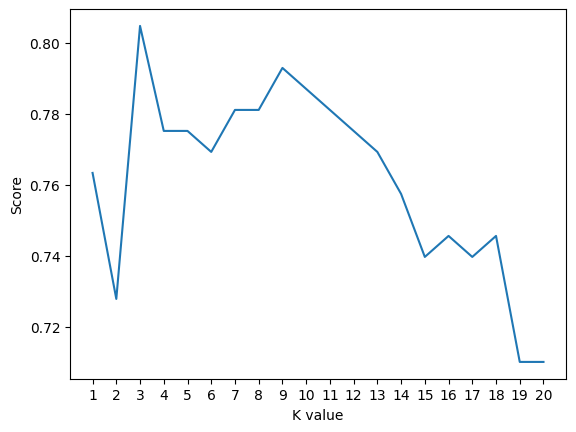

KNN best accuracy: 80.47%


In [263]:
scoreListknn = []
for i in range(1,21):
    KNclassifier = KNeighborsClassifier(n_neighbors = i)
    KNclassifier.fit(X_train, y_train)
    scoreListknn.append(KNclassifier.score(X_test, y_test))
    
plt.plot(range(1,21), scoreListknn)
plt.xticks(np.arange(1,21,1))
plt.xlabel("K value")
plt.ylabel("Score")
plt.show()
KNAcc = max(scoreListknn)
print("KNN best accuracy: {:.2f}%".format(KNAcc*100))

In [264]:
SVCclassifier = SVC(kernel='rbf', max_iter=500)
SVCclassifier.fit(X_train, y_train)

y_pred = SVCclassifier.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
SVCAcc = accuracy_score(y_pred,y_test)
print('SVC accuracy: {:.2f}%'.format(SVCAcc*100))

              precision    recall  f1-score   support

           0       0.98      0.59      0.74        86
           1       0.70      0.99      0.82        83

    accuracy                           0.79       169
   macro avg       0.84      0.79      0.78       169
weighted avg       0.84      0.79      0.78       169

[[51 35]
 [ 1 82]]
SVC accuracy: 78.70%


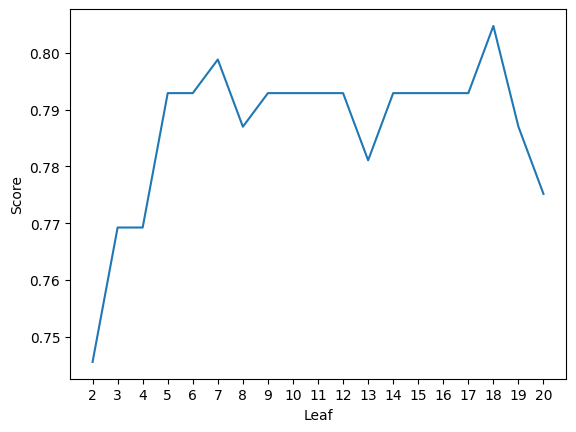

Decision Tree Accuracy: 80.47%


In [265]:
scoreListDT = []
for i in range(2,21):
    DTclassifier = DecisionTreeClassifier(max_leaf_nodes=i)
    DTclassifier.fit(X_train, y_train)
    scoreListDT.append(DTclassifier.score(X_test, y_test))
    
plt.plot(range(2,21), scoreListDT)
plt.xticks(np.arange(2,21,1))
plt.xlabel("Leaf")
plt.ylabel("Score")
plt.show()
DTAcc = max(scoreListDT)
print("Decision Tree Accuracy: {:.2f}%".format(DTAcc*100))

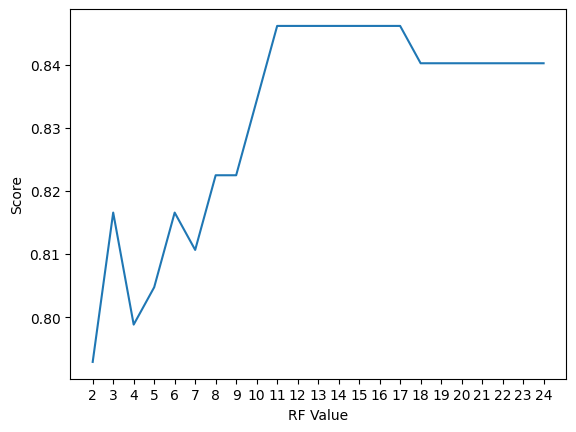

Random Forest Accuracy:  84.62%


In [266]:
scoreListRF = []
for i in range(2,25):
    RFclassifier = RandomForestClassifier(n_estimators = 1000, random_state = 1, max_leaf_nodes=i)
    RFclassifier.fit(X_train, y_train)
    scoreListRF.append(RFclassifier.score(X_test, y_test))
    
plt.plot(range(2,25), scoreListRF)
plt.xticks(np.arange(2,25,1))
plt.xlabel("RF Value")
plt.ylabel("Score")
plt.show()
RFAcc = max(scoreListRF)
print("Random Forest Accuracy:  {:.2f}%".format(RFAcc*100))

In [267]:
compare = pd.DataFrame({'Model': ['Logistic Regression', 'K Neighbors', 'SVM', 'Decision Tree', 
                                  'Random Forest'], 
                        'Accuracy': [LRAcc*100, KNAcc*100, SVCAcc*100, 
                                      DTAcc*100, 
                                     RFAcc*100]})
compare.sort_values(by='Accuracy', ascending=False)

,Model,Accuracy
4,Random Forest,84.615385
1,K Neighbors,80.473373
3,Decision Tree,80.473373
0,Logistic Regression,79.881657
2,SVM,78.698225


In [268]:
# Save the model using pickle
with open('/kaggle/working/final_random_forest_model.pkl', 'wb') as model_file:
    pickle.dump(RFclassifier, model_file)

In [269]:
# Load the model for predictions
with open('/kaggle/working/final_random_forest_model.pkl', 'rb') as model_file:
    loaded_model = pickle.load(model_file)

In [270]:
new_data = pd.DataFrame({
    'Gender': [1],
    'MaritalStatus': [0],
    'Dependents': [0],
    'Education': [1],
    'Self_Employed': [0],
    'ApplicantIncome': [5000],
    'CoapplicantIncome': [2000],
    'LoanAmount': [150],
    'Loan_Amount_Term': [360],
    'Credit_History': [1],
    'Total_Income': [7000],
    'Property_Area': [1],
    'CarsAvailable': [0],
    'DebtToIncomeRatio': [2.0],
    'InterestRate': [0.0]
})


In [272]:
# Check the feature indices in the training data
training_feature_indices = set(range(X_train.shape[1]))

# Check the feature indices in the prediction data
prediction_feature_indices = set(range(new_data.shape[1]))

# Ensure consistency in feature indices
missing_indices = training_feature_indices - prediction_feature_indices
extra_indices = prediction_feature_indices - training_feature_indices

# Add missing columns with zeros
for idx in missing_indices:
    # Make sure the index is within bounds
    if idx <= new_data.shape[1]:
        new_data = np.insert(new_data, idx, 0, axis=1)
    else:
        print(f"Index {idx} is out of bounds for axis 1 with size {new_data.shape[1]}")

# Drop extra columns
new_data = np.delete(new_data, list(extra_indices), axis=1)

# Make predictions
predictions = loaded_model.predict(new_data)

# Print predictions
for prediction in predictions:
    if prediction == 0:
        print("Loan Status Prediction: No")
    elif prediction == 1:
        print("Loan Status Prediction: Yes")
    else:
        print("Invalid Prediction")


Loan Status Prediction: No
